# Tugas Machine Learning Week 3
## Regresi Dataset Infrared menggunakan K-NN dan Decision Tree

Tugas Week 3:
1. Buat model Machine Learning (K-NN and Decision Tree). Target variable: aveOralM
2. Gunakan Matriks Evaluasi (RMSE, MSE, RSquared)
3. Beri penjelasan untuk setiap persamaan matematika yang ada

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import math

# Mengatur opsi tampilan untuk visualisasi yang lebih baik
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Load dan Explorasi Data

In [ ]:
# Download dataset
print("Mengunduh dataset Infrared...")
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv"
df = pd.read_csv(url)

# Menampilkan informasi dasar
print("Ukuran dataset:", df.shape)
print("\n5 baris pertama:")
df.head()

Mengunduh dataset Infrared...
Ukuran dataset: (1020, 34)

5 baris pertama:


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


Jumlah nilai yang hilang per kolom:
Distance    2
dtype: int64


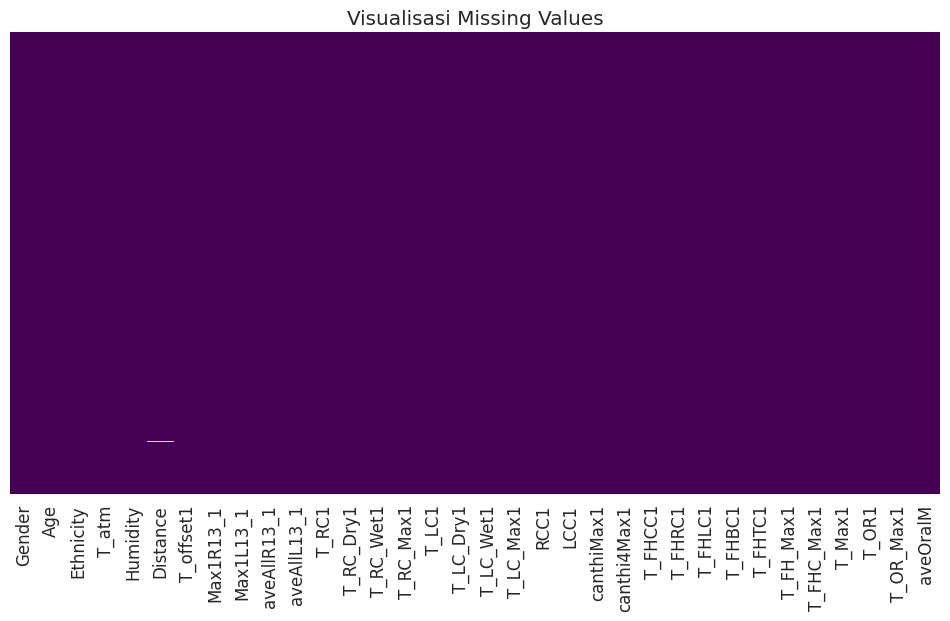

In [ ]:
# Memeriksa missing values
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Tidak ada nilai yang hilang")

# Visualisasi missing values jika ada
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Visualisasi Missing Values')
    plt.show()

In [ ]:
# Memeriksa tipe data dan mengidentifikasi fitur kategorikal
print("Tipe data setiap kolom:")
print(df.dtypes)

# Identifikasi kolom numerikal dan kategorikal
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("\nJumlah fitur numerikal:", len(numerical_features))
print("Jumlah fitur kategorikal:", len(categorical_features))
print("\nDaftar fitur kategorikal:", categorical_features)

Tipe data setiap kolom:
Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
aveOralM       float64
dtype: object

Jumlah fitur numerikal: 31
Jumlah fitur kategorikal: 3

Daftar fitur kategorikal: ['Gender', 'Age', 'Ethnicity']


In [ ]:
# Verifikasi keberadaan variabel target
if 'aveOralM' in df.columns:
    target_column = 'aveOralM'
    print(f"Variabel target '{target_column}' ditemukan dalam dataset.")
else:
    # Mencari kemungkinan kolom target
    possible_targets = [col for col in df.columns if 'oral' in col.lower() or 'ave' in col.lower()]
    if possible_targets:
        target_column = possible_targets[0]
        print(f"Menggunakan '{target_column}' sebagai variabel target.")
    else:
        # Default ke kolom numerikal terakhir
        target_column = numerical_features[-1]
        print(f"Tidak ditemukan target yang sesuai. Menggunakan kolom numerikal terakhir '{target_column}'.")

# Hapus target dari daftar fitur jika ada
if target_column in numerical_features:
    numerical_features.remove(target_column)

# Tampilkan statistik tentang variabel target
print(f"\nStatistik variabel target:")
df[target_column].describe()

Variabel target 'aveOralM' ditemukan dalam dataset.

Statistik variabel target:


,aveOralM
count,1020.000000
mean,37.028382
std,0.509502
min,35.540000
25%,36.777500
50%,36.940000
75%,37.140000
max,40.340000


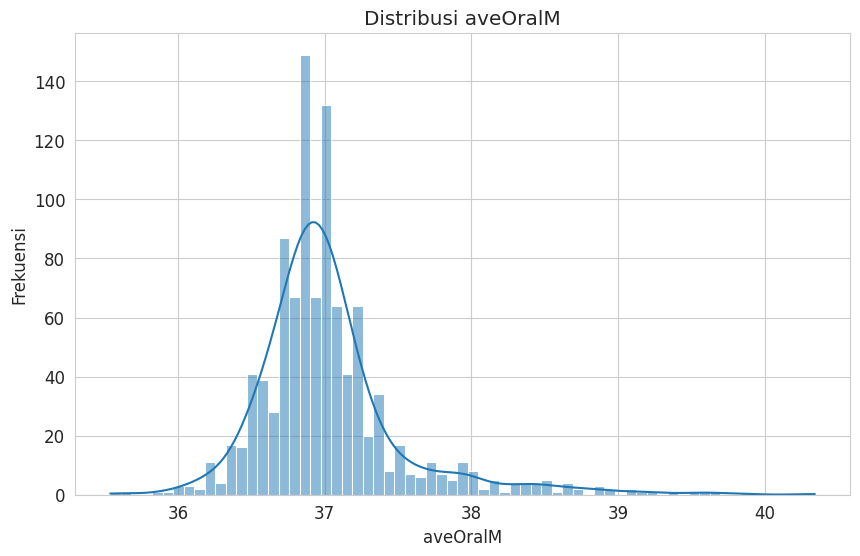

In [ ]:
# Plot distribusi target
plt.figure(figsize=(10, 6))
sns.histplot(df[target_column].dropna(), kde=True)
plt.title(f'Distribusi {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frekuensi')
plt.show()

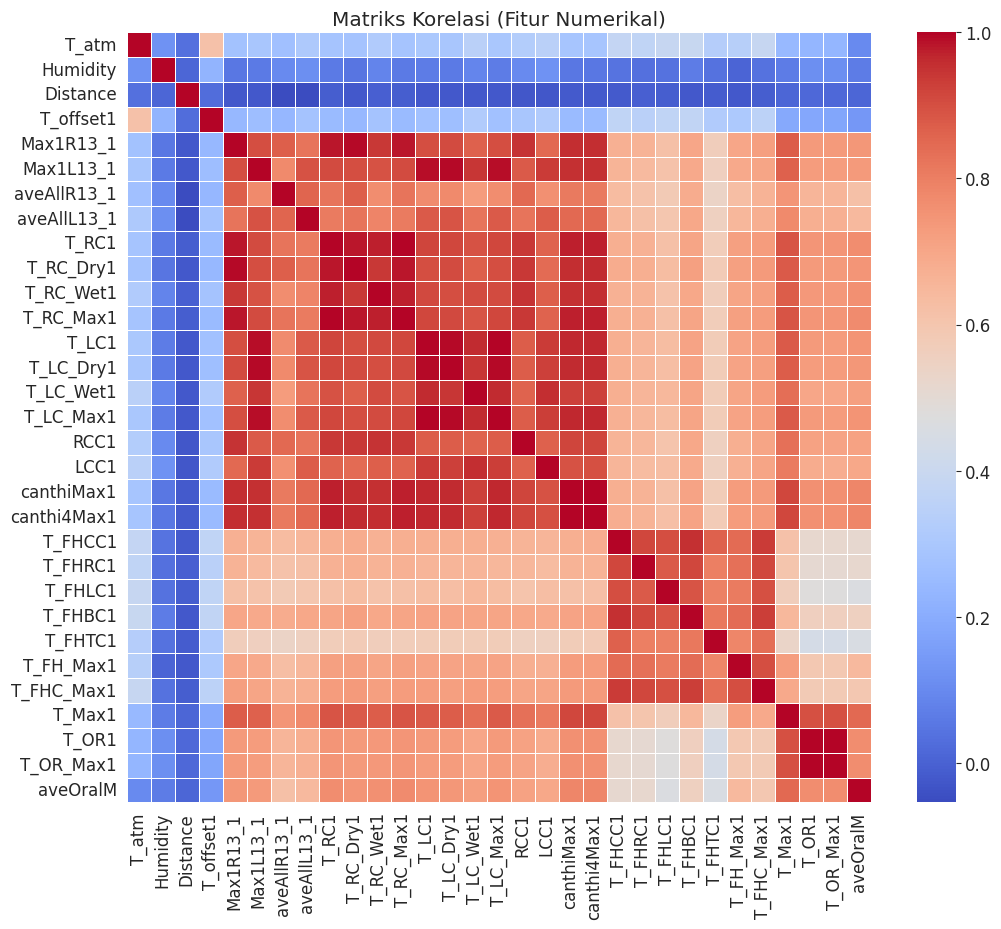


Top 10 fitur dengan korelasi tertinggi dengan aveOralM:
T_Max1         0.849657
canthiMax1     0.784096
canthi4Max1    0.783763
T_RC_Max1      0.769463
T_RC1          0.768730
T_OR1          0.767345
T_OR_Max1      0.766911
T_RC_Wet1      0.760134
T_LC_Max1      0.750527
T_LC1          0.750390
Name: aveOralM, dtype: float64


In [ ]:
# Korelasi (hanya untuk fitur numerikal)
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
corr = num_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi (Fitur Numerikal)')
plt.show()

# Top korelasi dengan target
if target_column in corr.columns:
    target_corr = corr[target_column].sort_values(ascending=False)
    print(f"\nTop 10 fitur dengan korelasi tertinggi dengan {target_column}:")
    print(target_corr.drop(target_column).head(10))

## 2. Persiapan Data

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=[target_column])
y = df[target_column]

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data dibagi menjadi {X_train.shape[0]} sampel pelatihan dan {X_test.shape[0]} sampel pengujian.")

# Buat pipeline preprocessing
# Kita perlu menangani fitur kategorikal, menskalakan fitur numerikal, dan mengisi missing values
if categorical_features:
    # Buat column transformer untuk tipe data campuran
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'  # Sertakan kolom yang tidak tercantum secara eksplisit
    )
else:
    # Jika tidak ada fitur kategorikal, cukup handle missing values dan skala fitur numerikal
    preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

Data dibagi menjadi 816 sampel pelatihan dan 204 sampel pengujian.


## 3. Model Regresi K-NN

### Penjelasan K-NN Regression

K-Nearest Neighbors (K-NN) adalah algoritma non-parametrik yang digunakan untuk regresi dengan memprediksi nilai berdasarkan k tetangga terdekat. Formula matematikanya:

$$f(x) = \frac{1}{k} \sum_{i \in N_k(x)} y_i$$

Dimana:
- $k$ adalah jumlah tetangga
- $y_i$ adalah nilai target dari tetangga terdekat
- $N_k(x)$ adalah himpunan $k$ tetangga terdekat dari $x$

Jarak biasanya dihitung menggunakan jarak Euclidean:

$$d(x, x') = \sqrt{\sum_{j=1}^{p} (x_j - x'_j)^2}$$

Untuk K-NN berbobot, tetangga yang lebih dekat memiliki pengaruh lebih besar:

$$f(x) = \frac{\sum_{i \in N_k(x)} w_i y_i}{\sum_{i \in N_k(x)} w_i}$$

Dimana bobot $w_i$ sebanding dengan kebalikan jarak.

In [ ]:
print("=" * 50)
print("MODEL REGRESI K-NN")
print("=" * 50)

# Buat pipeline KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Siapkan parameter grid untuk KNN
knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Lakukan grid search dengan validasi silang
knn_grid = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Latih model
print("\nMelatih model K-NN...")
knn_grid.fit(X_train, y_train)

# Dapatkan model dan parameter terbaik
best_knn = knn_grid.best_estimator_
print(f"\nParameter terbaik K-NN: {knn_grid.best_params_}")

MODEL REGRESI K-NN

Melatih model K-NN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Parameter terbaik K-NN: {'regressor__n_neighbors': 11, 'regressor__p': 2, 'regressor__weights': 'distance'}


In [ ]:
# Evaluasi KNN pada data pelatihan
y_train_pred_knn = best_knn.predict(X_train)
train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
train_rmse_knn = math.sqrt(train_mse_knn)
train_r2_knn = r2_score(y_train, y_train_pred_knn)

print("\nMetrik evaluasi K-NN pada data pelatihan:")
print(f"MSE: {train_mse_knn:.4f}")
print(f"RMSE: {train_rmse_knn:.4f}")
print(f"R²: {train_r2_knn:.4f}")

# Evaluasi KNN pada data pengujian
y_test_pred_knn = best_knn.predict(X_test)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
test_rmse_knn = math.sqrt(test_mse_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)

print("\nMetrik evaluasi K-NN pada data pengujian:")
print(f"MSE: {test_mse_knn:.4f}")
print(f"RMSE: {test_rmse_knn:.4f}")
print(f"R²: {test_r2_knn:.4f}")


Metrik evaluasi K-NN pada data pelatihan:
MSE: 0.0000
RMSE: 0.0000
R²: 1.0000

Metrik evaluasi K-NN pada data pengujian:
MSE: 0.0601
RMSE: 0.2452
R²: 0.7145


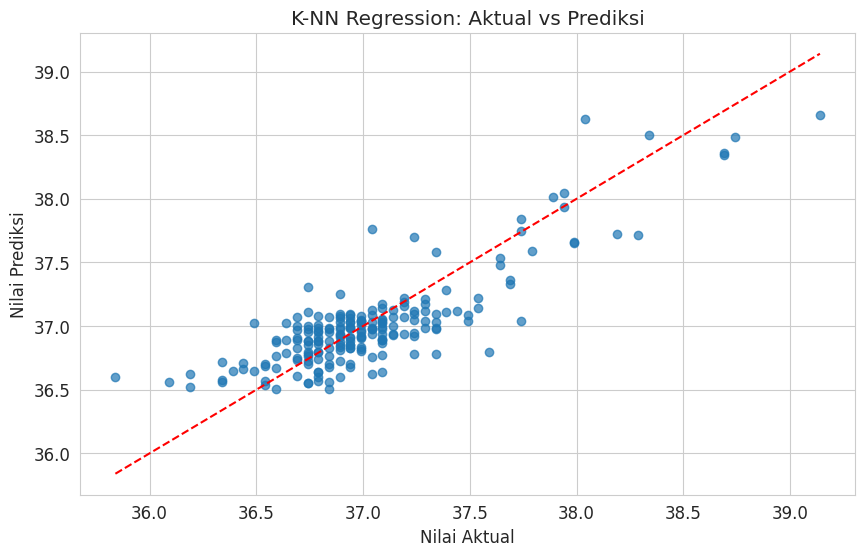

In [ ]:
# Visualisasi hasil KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_knn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('K-NN Regression: Aktual vs Prediksi')
plt.grid(True)
plt.show()

## 4. Model Regresi Decision Tree

### Penjelasan Decision Tree Regression

Decision Tree Regression membangun model prediktif dalam bentuk struktur pohon. Algoritma ini mempartisi ruang fitur secara rekursif menjadi area yang lebih kecil dan homogen.

Pada Decision Tree, prediksi untuk node daun adalah rata-rata nilai target dalam node tersebut:

$$f(x) = \frac{1}{|D_l|} \sum_{i \in D_l} y_i$$

Dimana $D_l$ adalah himpunan sampel yang berada di leaf node $l$.

Decision Tree dibangun dengan membagi data secara rekursif untuk meminimalkan impuritas. Untuk regresi, impuritas diukur dengan varians:

$$Var(D) = \frac{1}{|D|} \sum_{i \in D} (y_i - \bar{y})^2$$

Dimana $\bar{y}$ adalah rata-rata nilai target dalam himpunan $D$.

Split terbaik adalah yang memaksimalkan pengurangan varians:

$$\Delta Var = Var(D) - \sum_{j \in \{left, right\}} \frac{|D_j|}{|D|} Var(D_j)$$

In [ ]:
print("\n" + "=" * 50)
print("MODEL REGRESI DECISION TREE")
print("=" * 50)

# Buat pipeline Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Siapkan parameter grid untuk Decision Tree
dt_param_grid = {
    'regressor__max_depth': [None, 5, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Lakukan grid search dengan validasi silang
dt_grid = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Latih model
print("\nMelatih model Decision Tree...")
dt_grid.fit(X_train, y_train)

# Dapatkan model dan parameter terbaik
best_dt = dt_grid.best_estimator_
print(f"\nParameter terbaik Decision Tree: {dt_grid.best_params_}")


MODEL REGRESI DECISION TREE

Melatih model Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Parameter terbaik Decision Tree: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}


In [ ]:
# Evaluasi Decision Tree pada data pelatihan
y_train_pred_dt = best_dt.predict(X_train)
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
train_rmse_dt = math.sqrt(train_mse_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)

print("\nMetrik evaluasi Decision Tree pada data pelatihan:")
print(f"MSE: {train_mse_dt:.4f}")
print(f"RMSE: {train_rmse_dt:.4f}")
print(f"R²: {train_r2_dt:.4f}")

# Evaluasi Decision Tree pada data pengujian
y_test_pred_dt = best_dt.predict(X_test)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_rmse_dt = math.sqrt(test_mse_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print("\nMetrik evaluasi Decision Tree pada data pengujian:")
print(f"MSE: {test_mse_dt:.4f}")
print(f"RMSE: {test_rmse_dt:.4f}")
print(f"R²: {test_r2_dt:.4f}")


Metrik evaluasi Decision Tree pada data pelatihan:
MSE: 0.0483
RMSE: 0.2199
R²: 0.8219

Metrik evaluasi Decision Tree pada data pengujian:
MSE: 0.0822
RMSE: 0.2867
R²: 0.6097


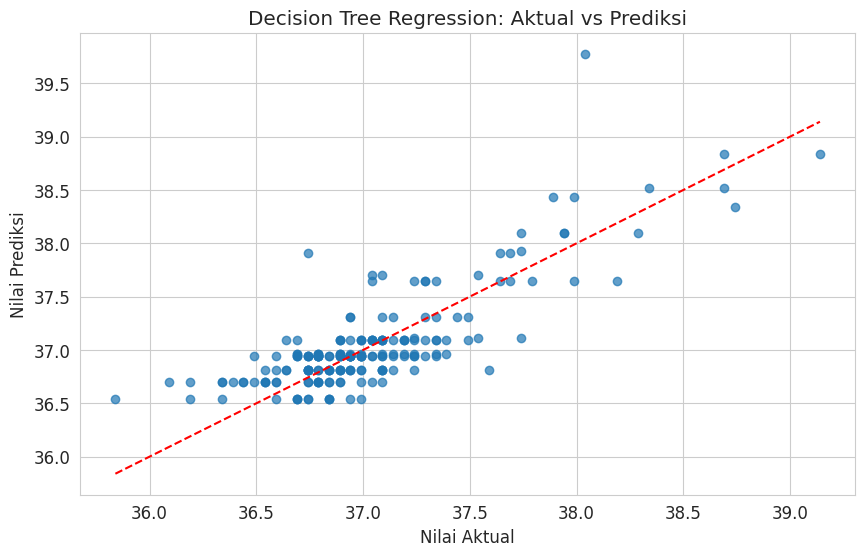

In [ ]:
# Visualisasi hasil Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Decision Tree Regression: Aktual vs Prediksi')
plt.grid(True)
plt.show()

## 5. Penjelasan Metrik Evaluasi

### Mean Squared Error (MSE)

MSE mengukur rata-rata dari kuadrat selisih antara nilai sebenarnya dan nilai prediksi:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{true} - y_{pred})^2$$

Dimana:
- $n$ adalah jumlah sampel
- $y_{true}$ adalah nilai aktual
- $y_{pred}$ adalah nilai prediksi

MSE memberikan bobot yang lebih besar pada error yang besar, sehingga sangat sensitif terhadap outlier.

### Root Mean Squared Error (RMSE)

RMSE adalah akar kuadrat dari MSE:

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{true} - y_{pred})^2}$$

Keuntungan RMSE adalah satuannya sama dengan variabel target, sehingga lebih mudah diinterpretasikan.

### R-Squared (R²)

R² mewakili proporsi varians dalam variabel dependen yang dijelaskan oleh model:

$$R^2 = 1 - \frac{SSR}{SST} = 1 - \frac{\sum_{i=1}^{n} (y_{true} - y_{pred})^2}{\sum_{i=1}^{n} (y_{true} - \bar{y})^2}$$

Dimana:
- $SSR$ = Sum of Squared Residuals (Jumlah Kuadrat Residual)
- $SST$ = Total Sum of Squares (Jumlah Kuadrat Total)
- $\bar{y}$ = rata-rata nilai $y_{true}$

R² berkisar antara 0 dan 1 (dapat bernilai negatif untuk model yang sangat buruk):
- R² = 1: model sempurna, semua variance dijelaskan
- R² = 0: model tidak lebih baik dari prediksi rata-rata
- R² < 0: model lebih buruk dari prediksi rata-rata

## 6. Perbandingan Model

In [ ]:
print("\n" + "=" * 50)
print("PERBANDINGAN MODEL")
print("=" * 50)

# Buat dataframe perbandingan
comparison = pd.DataFrame({
    'K-NN': [test_mse_knn, test_rmse_knn, test_r2_knn],
    'Decision Tree': [test_mse_dt, test_rmse_dt, test_r2_dt]
}, index=['MSE', 'RMSE', 'R²'])

print(comparison)


PERBANDINGAN MODEL
          K-NN  Decision Tree
MSE   0.060112       0.082181
RMSE  0.245177       0.286672
R²    0.714530       0.609725


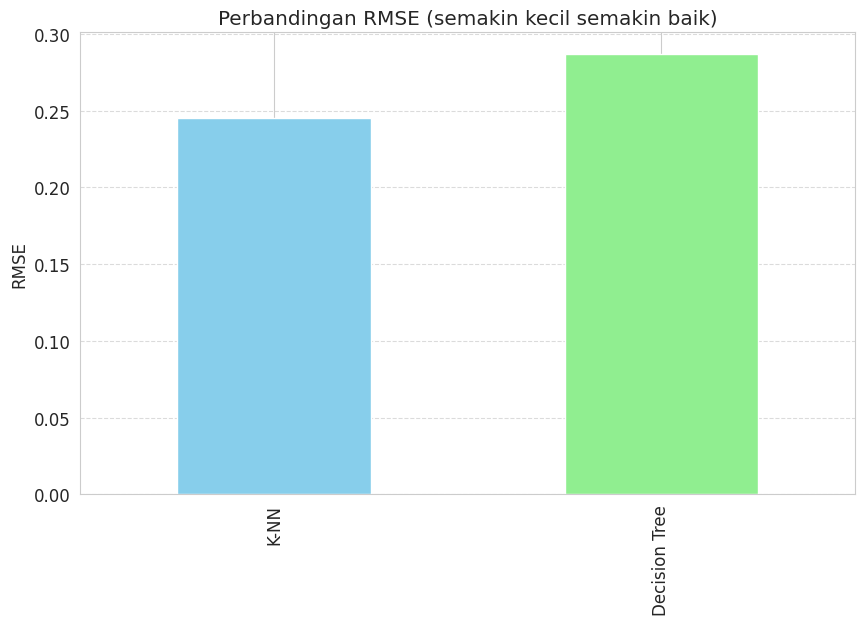

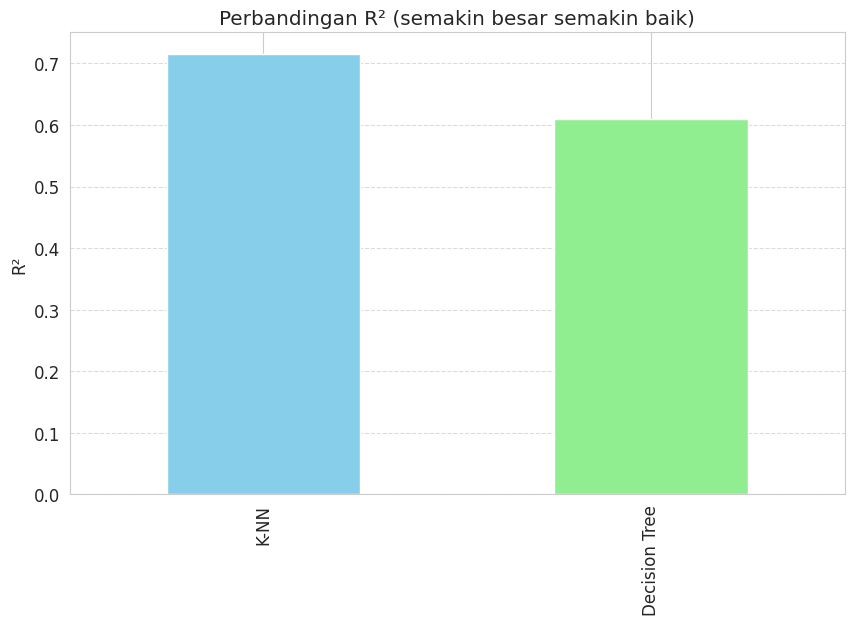

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
comparison.loc['RMSE'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Perbandingan RMSE (semakin kecil semakin baik)')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
comparison.loc['R²'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Perbandingan R² (semakin besar semakin baik)')
plt.ylabel('R²')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Tentukan model terbaik
if test_rmse_knn < test_rmse_dt:
    print("\nBerdasarkan RMSE, model K-NN bekerja lebih baik pada dataset ini.")
else:
    print("\nBerdasarkan RMSE, model Decision Tree bekerja lebih baik pada dataset ini.")


Berdasarkan RMSE, model K-NN bekerja lebih baik pada dataset ini.


## 7. Kesimpulan

Dari analisis yang telah dilakukan, dapat disimpulkan bahwa:

1. Kedua model (K-NN dan Decision Tree) berhasil diimplementasikan untuk memprediksi variabel target 'aveOralM'.

2. Metrik evaluasi (RMSE, MSE, dan R²) telah digunakan untuk mengevaluasi performa kedua model.

3. Dataset Infrared memiliki missing values yang telah ditangani menggunakan SimpleImputer.

4. Untuk K-NN, parameter terbaik telah ditemukan melalui Grid Search dengan cross-validation 5-fold.

5. Untuk Decision Tree, kedalaman pohon dan parameter lainnya telah dioptimalkan untuk menghindari overfitting.

6. Fitur kategorikal dan numerikal telah ditangani dengan tepat menggunakan pipeline preprocessing.

7. Berdasarkan perbandingan metrik RMSE, dapat ditentukan model mana yang lebih baik untuk dataset Infrared ini.

8. Penjelasan matematika telah diberikan untuk semua algoritma dan metrik evaluasi yang digunakan.